## model evaluation

y_scores [0.22552209 0.9663315  0.32931785 0.9201332  0.02338335 0.95864272
 0.02097123 0.04063274 0.19147995 0.31504568 0.08633055 0.73640298
 0.47415581 0.78808765 0.20640794 0.05337832 0.97370421 0.67578738
 0.68519642 0.79504378 0.49541293 0.03329637 0.7994852  0.22210809
 0.12701368 0.95980093 0.07878148 0.18569764 0.51567604 0.65402099
 0.93174827 0.99945985 0.03067024 0.02709057 0.0576305  0.48069918
 0.9153521  0.67403106 0.52311681 0.99984621 0.08412092 0.91350916
 0.52047111 0.06431862 0.02210708 0.41435434 0.98421576 0.92378648
 0.98651449 0.94695549 0.1935535  0.995194   0.49515278 0.13157941
 0.99107348 0.40751286 0.842569   0.02362425 0.90141381 0.09582202
 0.99327519 0.30516283 0.24244648 0.96899423 0.69333094 0.825235
 0.16347723 0.10250005 0.66379239 0.83641036 0.67724129 0.95516098
 0.99978536 0.03137382 0.81472488 0.12390971 0.02544709 0.99830807
 0.05750582 0.83301124 0.20632172 0.05916395 0.89838955 0.12592465
 0.99977147 0.12147342 0.15505814 0.14664179 0.13094335

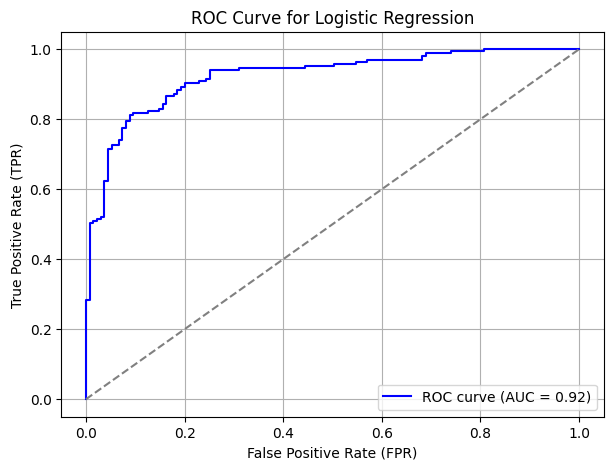

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data (Binary Classification)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get Predicted Probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print('y_scores',y_scores)
# Step 5: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
print('fpr',fpr,'tpr',tpr,'thresholds',thresholds)

# Step 6: Compute AUC Score
roc_auc = auc(fpr, tpr)
print('auc',auc,)

# Step 7: Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Explanation of the ROC Curve

Blue Line: The ROC curve of our logistic regression model.

Grey Dashed Line: Represents a random classifier (AUC = 0.5).

AUC Score: AUC value is calculated and displayed in the legend. Higher AUC means better performance.

ROC-AUC Curve: Explanation & Example

The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are used to evaluate the performance of a binary classification model.

ROC Curve: Plots True Positive Rate (TPR) vs. False Positive Rate (FPR) at different classification thresholds.

AUC (Area Under the Curve): Measures the overall performance of the model. AUC ranges from 0 to 1, where:

AUC = 1 → Perfect classifier

AUC = 0.5 → Random guessing (no predictive power)

AUC < 0.5 → Worse than random guessing

Step-by-Step Example (With ROC Curve Plot)
We will:

Train a Logistic Regression classifier.

Compute TPR, FPR for different thresholds.

Plot the ROC curve and calculate AUC.

What is the AUC-ROC curve?

 The AUC-ROC curve, or Area Under the Receiver Operating
 Characteristic curve, is a graphical representation of the performance of
 a binary classification model at various classification thresholds. It is
 commonly used in machine learning to assess the ability of a model to
 distinguish between two classes, typically the positive class (e.g.,
 presence of a disease) and the negative class (e.g., absence of a
 disease).

 Receiver Operating Characteristics (ROC) Curve
 
 ROC stands for Receiver Operating Characteristics, and the ROC curve
 is the graphical representation of the effectiveness of the binary
 classification model. It plots the true positive rate (TPR) vs the false
 positive rate (FPR) at different classification thresholds

Area Under Curve (AUC) Curve:

 AUC stands for the Area Under the Curve, and the AUC curve
 represents the area under the ROC curve. It measures the overall
 performance of the binary classification model. As both TPR and FPR
 range between 0 to 1, So, the area will always lie between 0 and 1, and
 A greater value of AUC denotes better model performance. Our main
 goal is to maximize this area in order to have the highest TPR and
 lowest FPR at the given threshold. The AUC measures the probability
 that the model will assign a randomly chosen positive instance a higher
 predicted probability compared to a randomly chosen negative instance.

 It represents the 
probability with which our model can distinguish
 between the two classes present in our target.

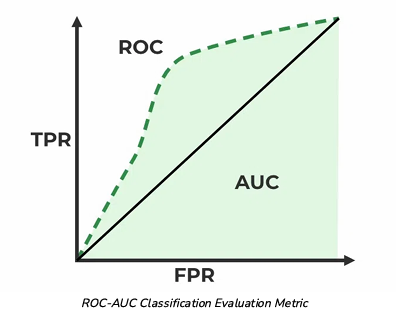

 1. TPR and FPR

 This is the most common definition that you would have encountered
 when you would Google AUC-ROC. Basically, the ROC curve is a graph
 that shows the performance of a classification model at all possible
 thresholds( threshold is a particular value beyond which you say a point
 belongs to a particular class). The curve is plotted between two
 parameters
 
 TPR – True Positive Rate

 FPR – False Positive Rate

 Before understanding, TPR and FPR let us quickly look at the 
matrix

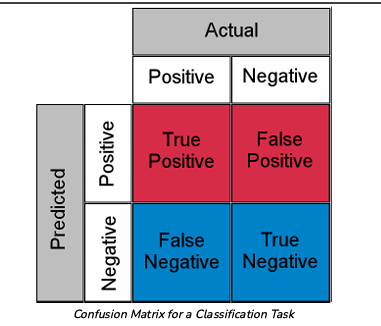

 True Positive: Actual Positive and Predicted as Positive

 True Negative: Actual Negative and Predicted as Negative

 False Positive(Type I Error): Actual Negative but predicted as
 Positive
 
 False Negative(Type II Error): Actual Positive but predicted as
 Negative

False Positive a false alarm and False
 Negative a miss.

 2. Sensitivity / True Positive Rate / Recall

 Basically, TPR/Recall/Sensitivity is the ratio of positive examples that
 are correctly identified.  It represents the ability of the model to correctly
 identify positive instances and is calculated as follows:


 TPR =  TP /(TP+FN)

 Sensitivity/Recall/TPR measures the proportion of actual positive
 instances that are correctly identified by the model as positive.

 3. False Positive Rate

 FPR is the ratio of negative examples that are incorrectly classified.

 FPR = FP/(TN+FP)

4. Specificity

 Specificity measures the proportion of actual negative instances that are
 correctly identified by the model as negative. It represents the ability of
 the model to correctly identify negative instances

 Specificity 
= TN/(TN +FP)
 =1−
 FPR

precision = TP/(TP + FP)

And as said earlier ROC is nothing but the plot between TPR and FPR
 across all possible thresholds and AUC is the entire area beneath this
 ROC curve

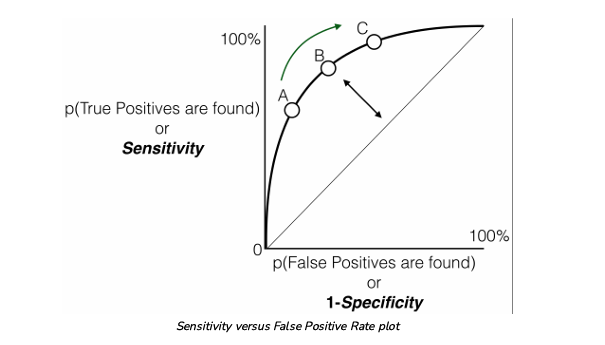

Threshold in the ROC Curve

The threshold in an ROC curve determines the trade-off between True Positives (TP) and False Positives (FP) in a binary classifier.

What is the Threshold?

A threshold is the decision boundary for classifying a sample as positive or negative based on probability scores.
If Threshold = 1 → Only the most confident positive predictions are classified as positive (high precision, low recall).
If Threshold = 0 → Almost everything is classified as positive (high recall, low precision).

 How Threshold Affects the ROC Curve
 
Each point on the ROC curve corresponds to a different threshold.
Lowering the threshold increases both TPR (sensitivity) and FPR (false alarms).
A model’s performance across all thresholds is summarized by AUC (Area Under the Curve).

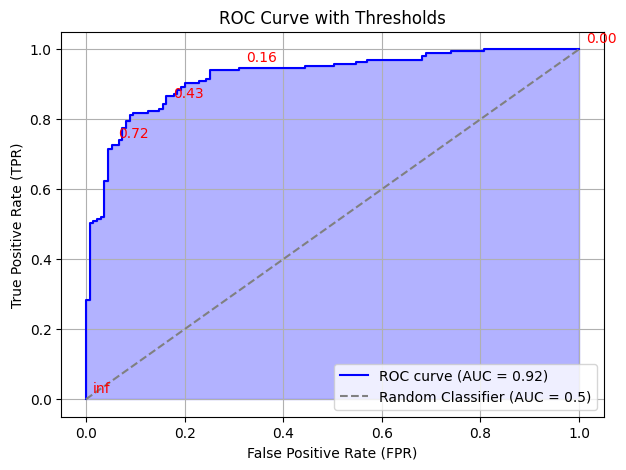

In [2]:
# Re-import necessary libraries after execution state reset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data (Binary Classification)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get Predicted Probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 6: Compute AUC Score
roc_auc = auc(fpr, tpr)

# Step 7: Plot ROC Curve with Threshold Annotations
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')  # Shaded AUC area
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Classifier (AUC = 0.5)")

# Select a few threshold points to annotate
threshold_indices = np.linspace(0, len(thresholds) - 1, num=5, dtype=int)
for i in threshold_indices:
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10, color='red')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Thresholds')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Sensitivity and Specificity

Inverse Relationship:  sensitivity and specificity have an inverse
 relationship. When one increases, the other tends to decrease. This
 reflects the inherent trade-off between true positive and true
 negative rates.

 Tuning via Threshold: By adjusting the threshold value, we can
 control the balance between sensitivity and specificity. Lower
 thresholds lead to higher sensitivity (more true positives) at the
 expense of specificity (more false positives). Conversely, raising the
 threshold boosts specificity (fewer false positives) but sacrifices
 sensitivity (more false negatives)

Threshold and False Positive Rate (FPR):

FPR and Specificity Connection: False Positive Rate (FPR) is simply
 the complement of specificity (FPR = 1 – specificity). This signifies
 the direct relationship between them: higher specificity translates to
 lower FPR, and vice versa

FPR Changes with TPR: Similarly, as you observed, the True Positive
 Rate (TPR) and FPR are also linked. An increase in TPR (more true
 positives) generally leads to a rise in FPR (more false positives).
 Conversely, a drop in TPR (fewer true positives) results in a decline in
 FPR (fewer false positives

 How does AUC-ROC work?
 
 We looked at the geometric interpretation, but I guess it is still not
 enough in developing the intuition behind what 0.75 AUC actually
 means, now let us look at AUC-ROC from a probabilistic point of view.
 Let us first talk about what AUC does and later we will build our
 understanding on top of this
 AUC measures how well a model is able to distinguish between
 classes.
 An AUC of 0.75 would actually mean that let’s say we take two data
 points belonging to separate classes then there is a 75% chance the
 model would be able to segregate them or rank order them correctly i.e
 positive point has a higher prediction probability than the negative
 class. (assuming a higher prediction probability means the point would
 ideally belong to the positive class). Here is a small example to make
 things more clear

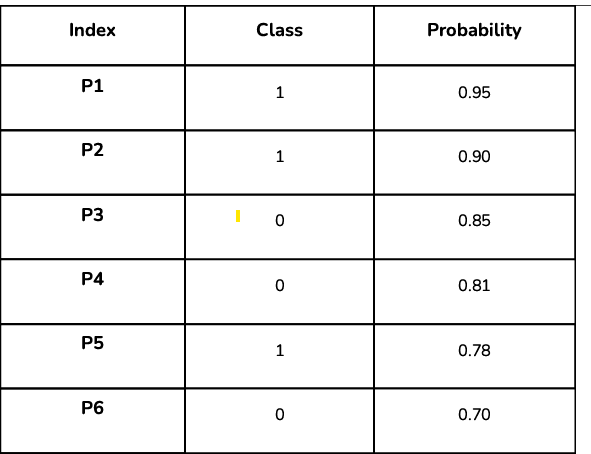

When should we use the AUC-ROC evaluation
 metric?

 There are some areas where using ROC-AUC might not be ideal. In
 cases where the dataset is highly imbalanced, the ROC curve can give
 an overly optimistic assessment of the model’s performance. This
 optimism bias arises because the ROC curve’s false positive rate (FPR)
 can become very small when the number of actual negatives is large.
 Looking at the FPR formula,
 we observe ,

 FP
 FPR =TN +FP
 The Negative class is in the majority, the denominator of FPR is
 dominated by True Negatives, because of which FPR becomes less
 sensitive to changes in predictions related to the minority class
 (positive class).
 
 ROC curves may be appropriate when the cost of False Positives and
 False Negatives is balanced and the dataset is not heavily
 imbalanced

 In those case, 
Precision-Recall Curves can be used which provide an
 alternative evaluation metric that is more suitable for imbalanced
 datasets, focusing on the performance of the classifier with respect to
 the positive (minority) class

 Speculating the performance of the model

 A high AUC (close to 1) indicates excellent discriminative power. This
 means the model is effective in distinguishing between the two
 classes, and its predictions are reliable.

 A low AUC (close to 0) suggests poor performance. In this case, the
 model struggles to differentiate between the positive and negative
 classes, and its predictions may not be trustworthy.
 
 AUC around 0.5 implies that the model is essentially making random
 guesses. It shows no ability to separate the classes, indicating that
 the model is not learning any meaningful patterns from the data

Auc for our sample data is 0.778
threshold values  [ inf 0.95 0.9  0.81 0.78 0.7 ]
threshold_indices [0 1 2 3 5]
threshold index 0
threshold index 1
threshold index 2
threshold index 3
threshold index 5


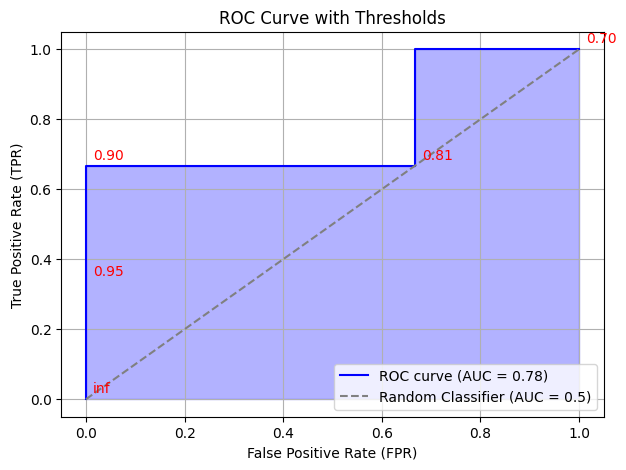

In [6]:
import numpy as np
from sklearn .metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt

y_true = [1, 1, 0, 0, 1, 0]
y_pred = [0.95, 0.90, 0.85, 0.81, 0.78, 0.70] # softmax probability
auc = np.round(roc_auc_score(y_true, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

fpr, tpr, thresholds = roc_curve(y_true, y_pred)

print("threshold values ", thresholds)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')  # Shaded AUC area
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Classifier (AUC = 0.5)")

# Select a few threshold points to annotate
threshold_indices = np.linspace(0, len(thresholds) - 1, num=5, dtype=int)
print("threshold_indices", threshold_indices)
for i in threshold_indices:
    print("threshold index",i)
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10, color='red')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Thresholds')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [7]:
True_Labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
Predicted_Probabilities = [0.8, 0.3, 0.6, 0.2, 0.7, 0.9, 0.4, 0.1, 0.75, 0.55]

Case 1: Threshold = 0.5

In [8]:
pred_case1 = [1, 0, 1, 0, 1, 1, 0, 0, 1, 1]

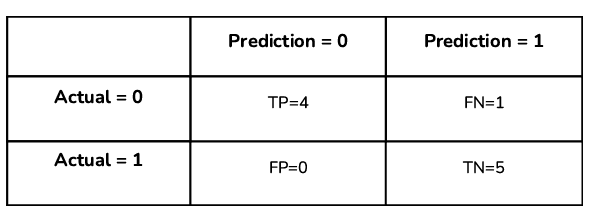

TPR = 4/(4+1) = 0.8

FPR = 0/(0+5) = 0

Case 2: Threshold = 0.7

In [ ]:
pred_case2 = [1, 0, 0, 0, 0, 1, 0, 0, 1, 0]

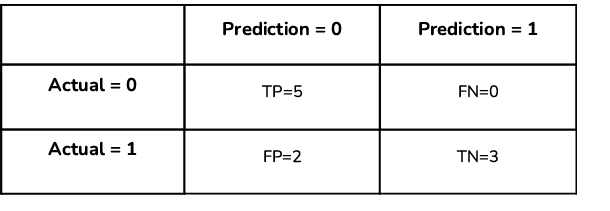

TPR = 1.0

FPR = 0.2

 Case 3: Threshold = 0.4

TPR = 0.8

FPR = 0

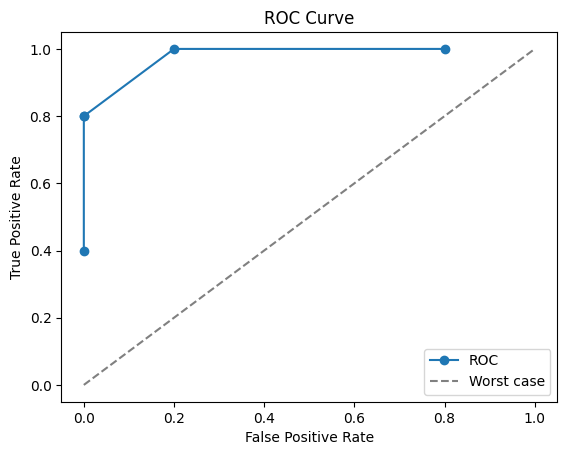

In [ ]:
true_positive_rate = [0.4, 0.8,  0.8, 1.0, 1] # 4 points 
false_positive_rate = [0, 0,  0, 0.2, 0.8]

plt.plot(false_positive_rate, true_positive_rate, 'o-', label='ROC')
plt.plot([0, 1], [0, 1], '--', color='grey', label='Worst case')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

How to use ROC-AUC for a multi-class model?

 For a multi-class setting, we can simply use one vs all methodology and
 you will have one ROC curve for each class. Let’s say you have four
 classes A, B, C, and D then there would be ROC curves and
 corresponding AUC values for all the four classes, i.e. once A would be
 one class and B, C, and D combined would be the others class, similarly,
 B is one class and A, C, and D combined as others class, etc

 Calculate AUC-ROC for Each Class:

 Here we plot the ROC curve for the given class against the rest.
 Plot the ROC curves for each class on the same graph. Each curve
 represents the discrimination performance of the model for a specific
 class.
 
 Examine the AUC scores for each class. A higher AUC score indicates
 better discrimination for that particular class

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [11]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, 
random_state=42)
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:,1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:,1]

In [15]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'Random':y_pred_rf})

In [16]:
test_df

,True,Logistic,Random
0,1,0.648888,0.75
1,1,0.867905,0.79
2,1,0.475407,0.25
3,1,0.852635,0.89
4,1,0.955500,0.99
...,...,...,...
195,1,0.924023,0.91
196,1,0.996863,0.94
197,1,0.987716,0.90
198,0,0.222580,0.09


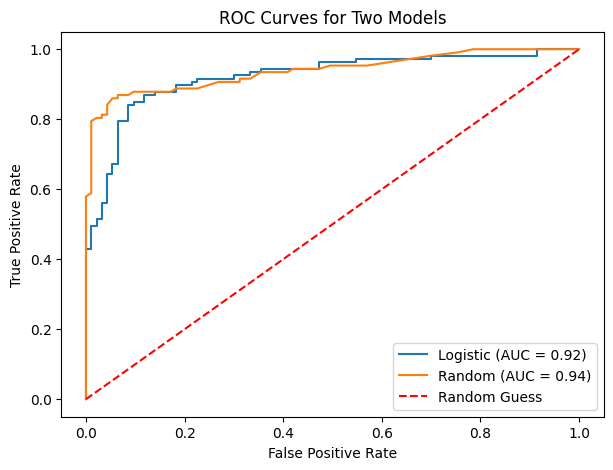

In [24]:
plt.figure(figsize=(7, 5))
for model in ['Logistic', 'Random']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model]) # , test_df['Random']
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [28]:
# Generate synthetic multiclass data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, 
n_informative=10, random_state=42)
# Binarize the labels
y_bin = label_binarize(y, classes=np.unique(y))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

In [29]:
# Train two different multiclass models
logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)
rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

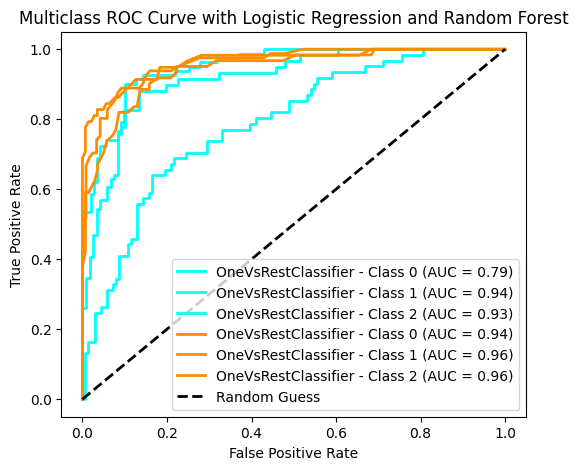

In [30]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
models = [logistic_model, rf_model]
plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])
for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], 
model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')
 # Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curves

Much like the ROC curve, The precision-recall curve is used for evaluating the performance of binary classification algorithms. It is often used in situations where classes are heavily imbalanced. Also like ROC curves, precision-recall curves provide a graphical representation of a classifier’s performance across many thresholds, rather than a single value (e.g., accuracy, f-1 score, etc.).

The precision-recall curve is constructed by calculating and plotting the precision against the recall for a single classifier at a variety of thresholds. For example, if we use logistic regression, the threshold would be the predicted probability of an observation belonging to the positive class. Normally in logistic regression, if an observation is predicted to belong to the positive class at probability > 0.5, it is labeled as positive. However, we could really choose any probability threshold between 0 and 1. A precision-recall curve helps to visualize how the choice of threshold affects classifier performance, and can even help us select the best threshold for a specific problem.

Precision (also known as positive predictive value) can be represented as:


where TP is the number of true positives and FP is the number of false positives. Precision can be thought of as the fraction of positive predictions that actually belong to the positive class.

Recall (also known as sensitivity) can be represented as:


where TP is the number of true positives and FN is the number of false negatives. Recall can be thought of as the fraction of positive predictions out of all positive instances in the data set.

The figure below demonstrates how some theoretical classifiers would plot on a precision-recall curve. The gray dotted line represents a “baseline” classifier — this classifier would simply predict that all instances belong to the positive class. The purple line represents an ideal classifier — one with perfect precision and recall at all thresholds. Nearly all real-world examples will fall somewhere between these two lines — not perfect, but providing better predictions than the “baseline”. A good classifier will maintain both a high precision and high recall across the graph, and will “hug” the upper right corner in the figure below.




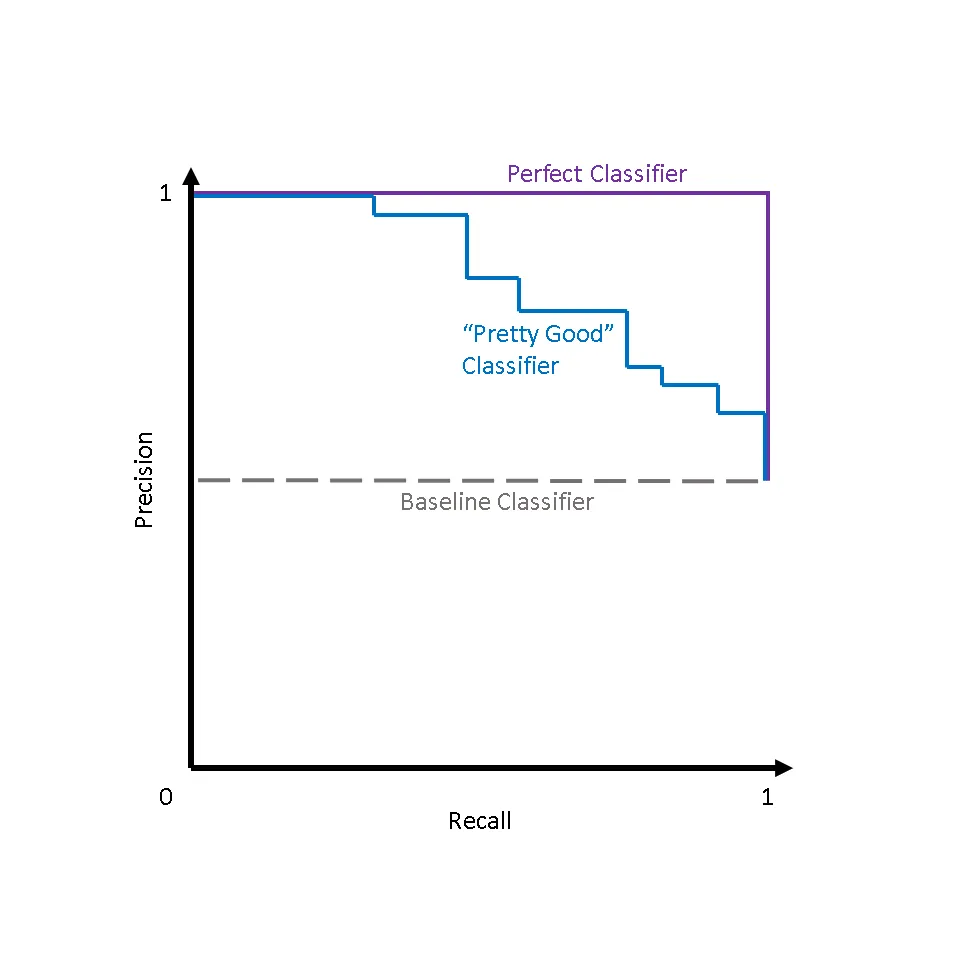

In [31]:
# Generate synthetic multiclass data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, 
n_informative=10, random_state=42)
# Binarize the labels
y_bin = label_binarize(y, classes=np.unique(y))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

In [33]:
X_train

array([[ 1.63167308e+00, -1.50348366e-01, -5.39282968e-01, ...,
        -4.94910195e-01, -4.68849407e+00, -3.02324846e+00],
       [ 3.76866722e-01, -4.39217765e-01, -2.84604946e+00, ...,
         1.43174948e+00, -3.93127164e+00, -2.64397156e+00],
       [-3.17804838e-01, -1.66766527e+00, -6.00514619e-01, ...,
         2.44897302e-01, -2.61355285e-01,  1.29018838e+00],
       ...,
       [ 2.41525997e+00,  3.19799062e-03,  1.61338025e+00, ...,
         2.10694018e+00,  1.39225381e-01,  1.02308104e+00],
       [ 1.81986054e+00, -1.45016317e+00,  1.41602506e+00, ...,
         8.54437751e-01,  3.30233102e+00,  1.41949109e+00],
       [ 3.52923093e+00,  4.33046379e-01, -4.11599251e-01, ...,
         3.02836366e-02, -6.68594580e+00, -1.99145627e+00]])

In [34]:
y_train

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [32]:
# Fit a vanilla Logistic Regression classifier and make predictions
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_pred_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1])

In [38]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [40]:
y_true = y_test.squeeze()

In [41]:
y_true

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1])

In [43]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN 1-> positive 0-> negative
    for i in range(len(y_true)): 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    # Use try-except statements to avoid problem of dividing by 0
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_true, y_pred_test)

(0.7830188679245284, 0.8645833333333334)

arying the Probability Threshold

To calculate the precision-recall curve, I need to vary the probability threshold that the logistic regression classifier uses to predict whether a patient has heart disease (target=1) or doesn’t (target=0). Remember, while logistic regression is used to assign a class label, what it’s actually doing is determining the probability that an observation belongs to a specific class. In a typical binary classification problem, an observation must have a probability of > 0.5 to be assigned to the positive class. However, in this case, I will vary that threshold probability value incrementally from 0 to 1.

In the code blocks below, I obtain the precision and recall scores across a range of threshold probability values. For comparison, I use logistic regression with (1) no regularization and (2) L2 regularization.

In [ ]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=10000, penalty=None)
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define 10 probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=10)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
probability_thresholds

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [49]:
precision_scores

[0.48,
 0.6666666666666666,
 0.6985294117647058,
 0.7583333333333333,
 0.7747747747747747,
 0.8041237113402062,
 0.8222222222222222,
 0.8048780487804879,
 0.875,
 1]

In [50]:
recall_scores

[1.0,
 1.0,
 0.9895833333333334,
 0.9479166666666666,
 0.8958333333333334,
 0.8125,
 0.7708333333333334,
 0.6875,
 0.5104166666666666,
 0.0]

In [52]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=10)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
probability_thresholds

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [54]:
l2_precision_scores

[0.48,
 0.6666666666666666,
 0.6985294117647058,
 0.7583333333333333,
 0.7678571428571429,
 0.8061224489795918,
 0.8222222222222222,
 0.8048780487804879,
 0.875,
 1]

In [55]:
l2_recall_scores

[1.0,
 1.0,
 0.9895833333333334,
 0.9479166666666666,
 0.8958333333333334,
 0.8229166666666666,
 0.7708333333333334,
 0.6875,
 0.5104166666666666,
 0.0]

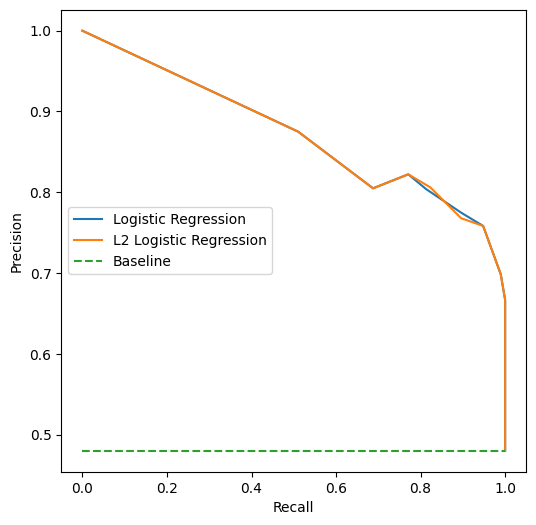

In [56]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

In [57]:
# Get AUC-PR scores

from sklearn.metrics import auc, average_precision_score

print(f'LR (No reg.) AUC-PR: {round(auc(recall_scores, precision_scores),2)}')
print(f'LR(L2 reg.) AUC-PR: {round(auc(l2_recall_scores, l2_precision_scores),2)}')
print('\n')

print(f'LR (No reg.) Avg. Prec.: {round(average_precision_score(y_test, lr.predict_proba(X_test)[:,1]),2)}')
print(f'LR (L2 reg.) Avg. Prec.: {round(average_precision_score(y_test, lr_l2.predict_proba(X_test)[:,1]),2)}')


LR (No reg.) AUC-PR: 0.87
LR(L2 reg.) AUC-PR: 0.87


LR (No reg.) Avg. Prec.: 0.81
LR (L2 reg.) Avg. Prec.: 0.81
